## Data Cleaning and Analysis

In [1]:
# Import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from datetime import datetime
from functools import reduce
import datetime
import quandl

from statsmodels.tsa.stattools import adfuller,grangercausalitytests
from statsmodels.tsa.stattools import ccovf,ccf,periodogram
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import scipy.stats as sp # SciPy for linear regression.

quandl.ApiConfig.api_key = '-kesKc4A8jkkBwyX3rSX'

In [80]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

data = quandl.get(["FRED/AHETPI", "FRED/CPIAUCSL", "FRED/TWEXBPA", "FRED/GDPC1", 
                    "FRED/FEDFUNDS", "FRED/FYFSD", "FRED/UNRATE", "FRED/NETEXC"], 
                  start_date="1986-01-01", end_date="2018-07-31",collapse = 'annual',date_parser=parser)
data.tail()

,FRED/AHETPI - Value,FRED/CPIAUCSL - Value,FRED/TWEXBPA - Value,FRED/GDPC1 - Value,FRED/FEDFUNDS - Value,FRED/FYFSD - Value,FRED/UNRATE - Value,FRED/NETEXC - Value
Date,,,,,,,,
2014-12-31,20.72,236.252,90.4614,17143.038,0.12,-484793.0,5.6,-617.916
2015-12-31,21.24,237.817,98.9911,17468.902,0.24,-441960.0,5.0,-752.787
2016-12-31,21.77,242.772,103.3297,17824.231,0.54,-584651.0,4.7,-834.625
2017-12-31,22.31,247.901,96.4675,18322.464,1.30,-665446.0,4.1,-883.789
2018-12-31,22.71,251.597,99.3349,18732.720,1.91,NaN,3.8,-962.441


In [81]:
data.columns = ['FRED/AHETPI - Value', 'FRED/CPIAUCSL - Value', 'FRED/TWEXBPA - Value', 'FRED/GDPC1 - Value',
                'FRED/FEDFUNDS - Value', 'FRED/FYFSD - Value', 'FRED/UNRATE - Value', 'FRED/NETEXC - Value']

data.rename(columns={'FRED/AHETPI - Value': 'hour_earn', 
                      'FRED/CPIAUCSL - Value': 'CPI',
                      'FRED/TWEXBPA - Value' : 'real_USD_index',
                      'FRED/GDPC1 - Value': 'real_GDP', 
                     'FRED/FEDFUNDS - Value': 'fed_fundsR',
                      'FRED/FYFSD - Value': 'surplus_deficit', 
                      'FRED/NETEXC - Value': 'real_net_exports',
                     'FRED/UNRATE - Value': 'unempR', 
                     }, inplace=True)

In [84]:
data['real_wage'] = data1['hour_earn']/data1['CPI'] # Add a column that calculates the real wage
data1.head()

,hour_earn,CPI,real_USD_index,real_GDP,fed_fundsR,surplus_deficit,unempR,real_net_exports,real_wage
Date,,,,,,,,,
1986-12-31,9.01,110.8,105.0487,8308.021,6.91,-221227.0,6.6,-226.253,0.081318
1987-12-31,9.28,115.6,92.3699,8680.162,6.77,-149730.0,5.7,-210.399,0.080277
1988-12-31,9.60,120.7,89.8466,9009.913,8.76,-155178.0,5.3,-164.985,0.079536
1989-12-31,9.98,126.3,93.1746,9257.128,8.45,-152639.0,5.4,-124.182,0.079018
1990-12-31,10.34,134.2,88.2319,9312.937,7.31,-221036.0,6.3,-74.627,0.077049


In [85]:
data.isna().sum() # number of missing values in all variables

hour_earn           0
CPI                 0
real_USD_index      0
real_GDP            0
fed_fundsR          0
surplus_deficit     1
unempR              0
real_net_exports    0
real_wage           1
dtype: int64

In [86]:
data.dropna(inplace = True) # drop the rows with missing values

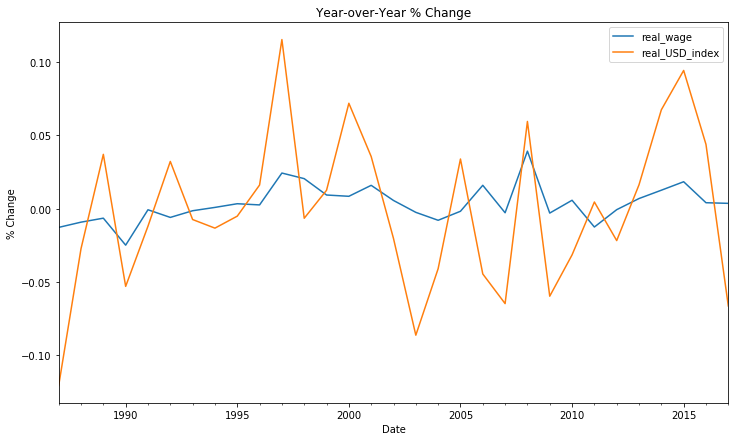

In [87]:
ax = data[['real_wage', 'real_USD_index']].pct_change().plot(figsize=(12,7),
                                            xlim=['1987-01-01','2018-08-01'], title='Year-over-Year % Change')
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='% Change');

The graph shows that the % change in real USD index appears to be a good leading indicator of the % change in real wage. This is because a change in the direction (or movement) of the USD index subsequently causes the real wage to move. The variables seem to be positively correlation and might have a spurious relationship.Further, the USD index is highly volatile (indicating higher variance than the real wage series). This is because changes in the macroeconomic variables (such as inflation, treasury rates, goods traded) of each country reprented in the USD index alters the index level. Alternatively, real wages in the US are more likely affected by domestic factors.

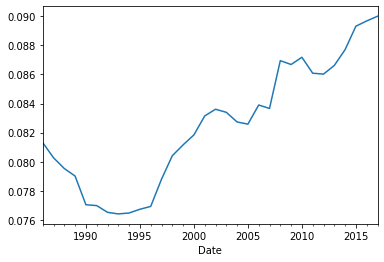

In [88]:
data['real_wage'].plot() # plot shows an upward trend starting early 1990s

In [89]:
change = data[['real_wage', 'real_USD_index', 'unempR', 'fed_fundsR', 
                'surplus_deficit','real_GDP', 'real_net_exports' ]].pct_change()
change.dropna(inplace = True)

In [90]:
change.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 1987-12-31 to 2017-12-31
Data columns (total 7 columns):
real_wage           31 non-null float64
real_USD_index      31 non-null float64
unempR              31 non-null float64
fed_fundsR          31 non-null float64
surplus_deficit     31 non-null float64
real_GDP            31 non-null float64
real_net_exports    31 non-null float64
dtypes: float64(7)
memory usage: 1.9 KB


In [91]:
change.head()

,real_wage,real_USD_index,unempR,fed_fundsR,surplus_deficit,real_GDP,real_net_exports
Date,,,,,,,
1987-12-31,-0.012800,-0.120694,-0.136364,-0.020260,-0.323184,0.044793,-0.070072
1988-12-31,-0.009228,-0.027317,-0.070175,0.293944,0.036385,0.037989,-0.215847
1989-12-31,-0.006511,0.037041,0.018868,-0.035388,-0.016362,0.027438,-0.247313
1990-12-31,-0.024919,-0.053048,0.166667,-0.134911,0.448096,0.006029,-0.399051
1991-12-31,-0.000770,-0.011970,0.158730,-0.393981,0.218073,0.011664,-0.264060


Before testing if the time series presents any peculiarities that might cause biases such as omitted variable bias and make the regression estimates inconsistent, I have checked for stationarity. A stationary series has the same properties (constant mean and variance) through time, and have any trends. i have done that by making the ACF plots and conducting the Augmented Dickey Fuller Test (ADF). 

## Test for Stationarity of the level and % change variables

In [92]:
def adfuller_test(series, signif = 0.05, name = '', verbose = False):
    """Perform ADFuller to test for stationarity of a given series and print report"""
    
    r = adfuller(series, autolag = 'AIC')
    output = {'test_statistic': round(r[0], 4), 'pvalue': round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue']
    def adjust(val, length = 6): return str(val).ljust(length)
    
    # print sumamry
    print(f'     Augmented Dickey-Fuller Test on "{name}"', "\n    ", '-'*47)
    print(f'  Null Hypothesis: Data has unit too. Non-Stationary.')
    print(f'  Significance Level    = {signif}')
    print(f'  Test Statistic        = {output["test_statistic"]}')
    print(f'  No. of Lags Chosen    = {output["n_lags"]}')
          
    for key, val in r[4].items():
          print(f'  Critical Value {adjust(key)} = {round(val, 3)}')
          
    if p_value <= signif:
          print(f" => P-Value = {p_value}. Rejecting null hypothesis.")
          print(f" => Series is stationary.")
    else:
          print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
          print(f" => Series is non-stationary.")
          
     # ADF Test on each column
for name, column in change.iteritems():
          adfuller_test(column, name = column.name)
          print('\n')

     Augmented Dickey-Fuller Test on "real_wage" 
     -----------------------------------------------
  Null Hypothesis: Data has unit too. Non-Stationary.
  Significance Level    = 0.05
  Test Statistic        = -3.407
  No. of Lags Chosen    = 3
  Critical Value 1%     = -3.7
  Critical Value 5%     = -2.976
  Critical Value 10%    = -2.628
 => P-Value = 0.0107. Rejecting null hypothesis.
 => Series is stationary.


     Augmented Dickey-Fuller Test on "real_USD_index" 
     -----------------------------------------------
  Null Hypothesis: Data has unit too. Non-Stationary.
  Significance Level    = 0.05
  Test Statistic        = -4.8965
  No. of Lags Chosen    = 0
  Critical Value 1%     = -3.67
  Critical Value 5%     = -2.964
  Critical Value 10%    = -2.621
 => P-Value = 0.0. Rejecting null hypothesis.
 => Series is stationary.


     Augmented Dickey-Fuller Test on "unempR" 
     -----------------------------------------------
  Null Hypothesis: Data has unit too. Non-Stationa

Since the % change variables - real wage and real USD index are stationary, they don't have a spurious relationship. So, if we regress real wage on the real USD index (or vice versa), the R squared will not be very high and the regression coefficients will likely not be significant. 

Both the % change series are stationary i.e. are integrated of order 0- I(0). Thus, no trend exists, implying that the series are not cointegrated. Had the series been non-stationary, the regression coefficents would be unbiased as as that would indicate a spurious regression. In level-terms, only the real wage variable has a unit root. Hence, regressing real wage on USD index will yield an unreasonabily high R squared value. This will apprear to generate a  statistically relationship between real wage and USD index, albeit they might be independent.

In [93]:
# ADF Test on each column
for name, column in data.iteritems():
          adfuller_test(column, name = column.name)
          print('\n')

     Augmented Dickey-Fuller Test on "hour_earn" 
     -----------------------------------------------
  Null Hypothesis: Data has unit too. Non-Stationary.
  Significance Level    = 0.05
  Test Statistic        = 1.9153
  No. of Lags Chosen    = 3
  Critical Value 1%     = -3.689
  Critical Value 5%     = -2.972
  Critical Value 10%    = -2.625
 => P-Value = 0.9986. Weak evidence to reject the Null Hypothesis.
 => Series is non-stationary.


     Augmented Dickey-Fuller Test on "CPI" 
     -----------------------------------------------
  Null Hypothesis: Data has unit too. Non-Stationary.
  Significance Level    = 0.05
  Test Statistic        = -1.0564
  No. of Lags Chosen    = 0
  Critical Value 1%     = -3.661
  Critical Value 5%     = -2.961
  Critical Value 10%    = -2.619
 => P-Value = 0.7321. Weak evidence to reject the Null Hypothesis.
 => Series is non-stationary.


     Augmented Dickey-Fuller Test on "real_USD_index" 
     -----------------------------------------------
  N

## Autocorrelation and Partial Autocorrelation Plots (ACF and PACF)

Non-stationarity of the % change series is also evident from the Aurocorrelation plots as the spikes lie within the significance level. Autocorrelation measures how the lagged values of the series are linearly related. 

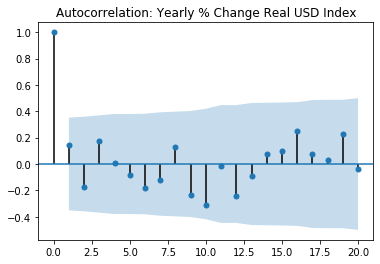

In [94]:
title = 'Autocorrelation: Yearly % Change Real USD Index'
lags = 20
plot_acf(change['real_USD_index'],title=title,lags=lags);

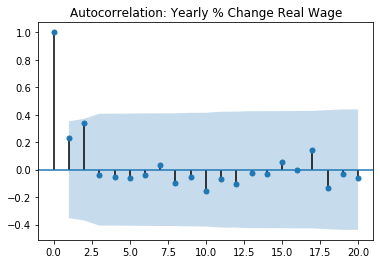

In [95]:
title = 'Autocorrelation: Yearly % Change Real Wage'
lags = 20
plot_acf(change['real_wage'],title=title,lags=lags);

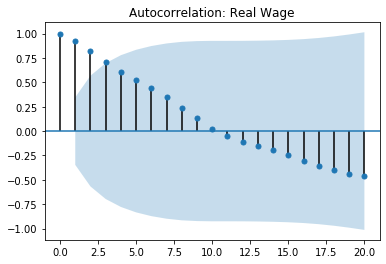

In [96]:
title = 'Autocorrelation: Real Wage'
lags = 20
plot_acf(data1['real_wage'],title=title,lags=lags);

## Granger Causality Tests

A hypothesis test that may indicate the presence of causality is the Granger Causality Test. It also determines if a time series is useful in forecasting another time series. While we can measure the correlation between the level and percent change in real wage and USD index, the correlation may change across time. Thus, causality may influence change in real wage to alter the change in the behavior of USD index through the years, affecting the correlation.

However, there may be a third variable - confounding variable, that can change the relationship between real wages and USD index. Examples of the confounding variable could be GDP growth rate, whether a nation is in a recession or not, whether US Dollar and other major currencies in the baset have appreciated or depreciated.Economically, a recession affects both real wage and USD index as the dollar will likely depreciate and the real wages will fall as unemployment rises. Alernatively, a higher GDP growth will appreciate USD and will generally increase the real wages if the labor market is tight.

If we exlcude one or more of these variables, the regression model may violate a Gauss Markov assumption of strict exogeneity. Therefore, the OLS estimator will be biased and inconsistent.

In the granger causality test, the null hypothesis is that lagged value of x do not explain the variations in y. So, x_t doesn't granger cause y_t.

In [97]:
# Does real_usd_index granger cause real_wage?
grangercausalitytests(change[['real_wage', 'real_USD_index']],maxlag=5);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7034  , p=0.4090  , df_denom=27, df_num=1
ssr based chi2 test:   chi2=0.7815  , p=0.3767  , df=1
likelihood ratio test: chi2=0.7715  , p=0.3797  , df=1
parameter F test:         F=0.7034  , p=0.4090  , df_denom=27, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5178  , p=0.6023  , df_denom=24, df_num=2
ssr based chi2 test:   chi2=1.2514  , p=0.5349  , df=2
likelihood ratio test: chi2=1.2251  , p=0.5420  , df=2
parameter F test:         F=0.5178  , p=0.6023  , df_denom=24, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8387  , p=0.4878  , df_denom=21, df_num=3
ssr based chi2 test:   chi2=3.3549  , p=0.3401  , df=3
likelihood ratio test: chi2=3.1687  , p=0.3663  , df=3
parameter F test:         F=0.8387  , p=0.4878  , df_denom=21, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.2579  , p=0.3226  , df_d

Since the p-values at lags from 1 to 5 lags are very high, we fail to reject the null hypothesis. So, the % change in real_USD_index does NOT Granger cause the % change in real_wage. The p-value is still higher than the significance level even at lags greater than 5. So, the past values of real_usd_index do not have a statistically significant effect on the current value of real_wage. Here, we consider the past values of real_wage as regressors.

In [98]:
# Does real_wage granger cause real_USD_index?
grangercausalitytests(change[['real_USD_index', 'real_wage']],maxlag=5);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3734  , p=0.5463  , df_denom=27, df_num=1
ssr based chi2 test:   chi2=0.4148  , p=0.5195  , df=1
likelihood ratio test: chi2=0.4120  , p=0.5210  , df=1
parameter F test:         F=0.3734  , p=0.5463  , df_denom=27, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4517  , p=0.6418  , df_denom=24, df_num=2
ssr based chi2 test:   chi2=1.0916  , p=0.5794  , df=2
likelihood ratio test: chi2=1.0716  , p=0.5852  , df=2
parameter F test:         F=0.4517  , p=0.6418  , df_denom=24, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6522  , p=0.5904  , df_denom=21, df_num=3
ssr based chi2 test:   chi2=2.6088  , p=0.4560  , df=3
likelihood ratio test: chi2=2.4943  , p=0.4763  , df=3
parameter F test:         F=0.6522  , p=0.5904  , df_denom=21, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8669  , p=0.5026  , df_d

## Correlation Coefficient

Likewise, the % change in real wage does NOT Granger cause the % change in the real USD index.

In [99]:
from scipy import stats
# Y and Z are numpy arrays or lists of variables 
stats.pearsonr(change['real_wage'], change['real_USD_index'])

(0.5728261130787866, 0.000757540217909627)

In [100]:
stats.pearsonr(data1['real_wage'], data1['real_USD_index'])

(0.12796170398943302, 0.48521550432726634)

While the % change in real wage and % change in real USD index have a low correlation coefficient of 57 percent, the levelled values of real wage and real USD index have extremely low correlation of 16 percent. This likely suggests that there exists a suprious correlation between the % change variables. 

Since we are assessing two time series data, causal inference isn't as important as it is in a cross-sectional data. If we are using the time series data to produce forecasts, the predictive power is more important than the explanatory power. There is a major drawbacks in assessing causal relationships in time series using methods such as OLS. Since time series is a realization of the stochastic process, data are not randomly sampled, as opposed to the data in cross-sectional studies. 


## Linear Regression

Since p-value of 0.05845 > 0.05, we fail to reject the null hypothesis. Real usd index does not explain the change in yearly wage. The small R squared of 33.33 percent indicates that the model only explains 33 percent, and the residuals explain the rest, indicating that the model is a poor fit. So, even though the line plot of yearly % change in real wage and real USD index seem to indicate that they comove, it is actually very insignificant. So, they are not related.

### Change: usd_index ~ beta * real_wage + error

In [101]:
import statsmodels.api as sm # import statsmodels 
X = change['real_USD_index']
y = change['real_wage']
X = sm.add_constant(X) ## add an intercept (beta_0) to the model


model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              real_wage   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     14.16
Date:                Fri, 31 Jan 2020   Prob (F-statistic):           0.000758
Time:                        01:57:18   Log-Likelihood:                 98.436
No. Observations:                  31   AIC:                            -192.9
Df Residuals:                      29   BIC:                            -190.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0035      0.002      1.881      0.070      -0.000       0.007
real_USD_index     0.1337      0.036      3.763      0.001       0.061       0.206
==============================================================================
Omnibus:                        2.821   Durbin-Watson:                   1.581
Prob(Omnibus):                  0.244   Jarque-Bera (JB):                1.500
Skew:                           0.388   Prob(JB):                        0.472
Kurtosis:                       3.747   Cond. No.                         18.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Diagnostic tests in the original model

In [102]:
# condition number - multicollinearity
np.linalg.cond(model.model.exog)

18.919412129522186

In [103]:
# Breush-Pagan test: Heteroskedasticity
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 0.2083490752087318),
 ('p-value', 0.6480644705216295),
 ('f-value', 0.19622602230101763),
 ('f p-value', 0.6610713782193837)]

## Improved Model

In [104]:
X = change[['real_USD_index', 'unempR',  'real_net_exports']]
y = change[ 'real_wage']
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model


model1 = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model1.predict(X)

# Print out the statistics
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              real_wage   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     7.238
Date:                Fri, 31 Jan 2020   Prob (F-statistic):            0.00103
Time:                        01:57:20   Log-Likelihood:                 101.42
No. Observations:                  31   AIC:                            -194.8
Df Residuals:                      27   BIC:                            -189.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0023      0.002      1.212      0.236      -0.002       0.006
real_USD_index       0.1012      0.037      2.732      0.011       0.025       0.177
unempR               0.0252      0.012      2.064      0.049       0.000       0.050
real_net_exports     0.0171      0.008      2.046      0.051   -4.77e-05       0.034
==============================================================================
Omnibus:                        1.598   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.450   Jarque-Bera (JB):                0.611
Skew:                           0.239   Prob(JB):                        0.737
Kurtosis:                       3.494   Cond. No.                         21.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Diagnostic tests in the improved model

an object of class OLSInfluence holds attributes and methods that allow users to assess the influence of each observation. For example, we can compute and extract the first few rows of DFbetas by:

In [105]:
# condition number - multicollinearity
np.linalg.cond(model1.model.exog)

21.184170160032235

In [106]:
# Breush-Pagan test: Heteroskedasticity
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model1.resid, model1.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 1.9793216491815815),
 ('p-value', 0.5767096478579399),
 ('f-value', 0.6138345433311297),
 ('f p-value', 0.6119517035905855)]

### Regression : level real wage ~ beta0+ beta1 * real USD index + beta2 * surplus deficit + beta3 * real_GDP

In [107]:
X = data1[['real_USD_index',  'surplus_deficit', 'real_GDP' ]]
y = data1['real_wage']
X = sm.add_constant(X) 


model2 = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model2.predict(X)

# Print out the statistics
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              real_wage   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     69.95
Date:                Fri, 31 Jan 2020   Prob (F-statistic):           4.02e-13
Time:                        01:57:24   Log-Likelihood:                 163.83
No. Observations:                  32   AIC:                            -319.7
Df Residuals:                      28   BIC:                            -313.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0514      0.004     11.857      0.000       0.043       0.060
real_USD_index      0.0002   4.85e-05      3.699      0.001       8e-05       0.000
surplus_deficit -4.024e-09   1.04e-09     -3.866      0.001   -6.16e-09   -1.89e-09
real_GDP         9.596e-07   1.18e-07      8.158      0.000    7.19e-07     1.2e-06
==============================================================================
Omnibus:                        2.409   Durbin-Watson:                   0.565
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                2.167
Skew:                           0.562   Prob(JB):                        0.338
Kurtosis:                       2.400   Cond. No.                     8.64e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.64e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
X = data1[['real_USD_index']]
y = data1['real_wage']
X = sm.add_constant(X) 
# Note the difference in argument order
model3 = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model3.predict(X)

# Print out the statistics
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              real_wage   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.4994
Date:                Fri, 31 Jan 2020   Prob (F-statistic):              0.485
Time:                        01:57:24   Log-Likelihood:                 129.86
No. Observations:                  32   AIC:                            -255.7
Df Residuals:                      30   BIC:                            -252.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0756      0.010      7.734      0.000       0.056       0.096
real_USD_index  7.324e-05      0.000      0.707      0.485      -0.000       0.000
==============================================================================
Omnibus:                        8.807   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                2.503
Skew:                           0.222   Prob(JB):                        0.286
Kurtosis:                       1.704   Cond. No.                     1.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The above regression output shows evidence of spurious relationship in the leveled values of real wage and real USD index as the R squared value is very high - 0.992, and the p-value of the real USD index of 0.000 shows an apparent significant relation, when in fact, they have very low correlation. 

Condition Index is an indicator of testing the presence of multicollinearity. A CI of more tha 30 indicates that the variables are highly correlated to each other. In the original and improved regressions, the CI is 18.9, and 26.2, respectively. These are well below the threshold, indicating that the data has no multicolloinearity.

In the Breush-Pagan test, the null hypothesis is that the errors are homoskedastic. In the original and final models, the p-values are 0.64 and 0.17, respectively, so we don't have sufficient evidence to reject the null hypothesis. Hence, the errors have constant variance.

Overall, the graph representing seemingly strong relationship between he % change in real wage and USD index is inaccurate as seen in the regression estimates and causality tests. Furthermore, the graphs depicts yearly $ change from Jan 1987 to June 2018. Collapsing the dataset to calculate yearly (and not montly) change futher reduces (to 32 observations) from the already few observations we had to begin with. Since the sample is not representative of the population, estimates from a statistical model will be biased, and the model will not be trustworty. 

Because of the small sized dataset, we cannot rely on the The Jarque-Bera test for normality. It measures whether the sample has kurtosis and skewness that corresponds to a normal distribution. This test is reliable on large datasets (greater than 2000 observations) as the test statistic has an asymptotic Chi square distribution.